# SVM - Heart Attack

In [1]:
import pandas as pd
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145,233.0,1,0.0,150,0.0,2.3,0.0,0,1,1
1,37,1,2.0,130,250.0,0,1.0,187,0.0,3.5,0.0,0,2,1
2,41,0,1.0,130,204.0,0,0.0,172,0.0,1.4,2.0,0,2,1
3,56,1,1.0,120,236.0,0,1.0,178,0.0,0.8,2.0,0,2,1
4,57,0,0.0,120,354.0,0,1.0,163,1.0,0.6,2.0,0,2,1


## Check and Drop Null data

There's 10 null values in the dataset, drop it. 
- How to check null value: [stackoverflow](https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe)
- How to drop null valus: [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().values.sum()

10

In [5]:
df.isnull().sum()

age         0
sex         0
cp          1
trestbps    0
chol        2
fbs         0
restecg     3
thalach     0
exang       1
oldpeak     2
slope       1
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

## Split Data into Features and Label

In [7]:
features = df.iloc[:, 0:13]
label = df['target']

## 特徵標準化
由於 SVM 的資料需要標準化。⽤ sklearn.preprocessing 的 StandardScaler 進行特徵標準化。

Standardize features by removing the <font color='red'>mean</font> and scaling to unit <font color='red'>variance</font>。
- For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of <font color='red'>Support Vector Machines</font> or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

After `fit()`, Mean and standard deviation are then stored to be used on later data using `transform()`.

In [9]:
scaler.mean_

array([5.42901024e+01, 6.82593857e-01, 9.65870307e-01, 1.31416382e+02,
       2.45853242e+02, 1.46757679e-01, 5.25597270e-01, 1.50003413e+02,
       3.27645051e-01, 1.04539249e+00, 1.39931741e+00, 7.33788396e-01,
       2.30716724e+00])

In [10]:
scaler.transform(features)

array([[ 0.96008384,  0.68190908,  1.97865831, ..., -2.26047188,
        -0.71658705, -2.12994828],
       [-1.90587175,  0.68190908,  1.00592864, ..., -2.26047188,
        -0.71658705, -0.50051004],
       [-1.46495551, -1.46647115,  0.03319897, ...,  0.9703489 ,
        -0.71658705, -0.50051004],
       ...,
       [ 1.51122914,  0.68190908, -0.93953071, ..., -0.64506149,
         1.23652928,  1.1289282 ],
       [ 0.29870947,  0.68190908, -0.93953071, ..., -0.64506149,
         0.25997112,  1.1289282 ],
       [ 0.29870947, -1.46647115,  0.03319897, ..., -0.64506149,
         0.25997112, -0.50051004]])

## Split Train, Test data

切分資料集與測試集，設 test_size=0.33, random_state=1
- Split arrays or matrices into random train and test subsets
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- 中文參數解釋: https://blog.csdn.net/liuxiao214/java/article/details/79019901

train_size：三种类型。float，int，None。
- float：0.0-1.0之间，代表训练数据集占总数据集的比例。
- int：代表训练数据集具体的样本数量。
- None：设置为test_size的补。
- default：默认为None。

random_state：三种类型。int，randomstate instance，None。
- int：是随机数生成器的种子。每次分配的数据相同。
- randomstate：random_state是随机数生成器的种子。（这里没太理解）
- None：随机数生成器是使用了np.random的randomstate。
- 种子相同，产生的随机数就相同。种子不同，即使是不同的实例，产生的种子也不相同。

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=1)

## Do SVM
最後，使用 sklearn.svm 裡的 SVC 進⾏分析，kernel 設為' linear
‘，並印出模型最終的準確度
- 官方文件: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Kernel Function官方文件: https://scikit-learn.org/stable/modules/svm.html#kernel-functions

In [12]:
from sklearn import svm

linear_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
linear_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

**Accurecy in Training set**

In [13]:
linear_svc.score(X_train, y_train)

0.8367346938775511

**Accurecy in Testing set**

In [14]:
linear_svc.score(X_test, y_test)

0.865979381443299

## Plot predicted result
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#38.-Cross-Correlation-plot

In [15]:
predict = linear_svc.predict(X_test)
predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

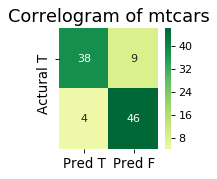

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, predict)

# Plot
plt.figure(figsize=(2,2), dpi= 80)
sns.heatmap(pd.DataFrame(cnf_matrix), xticklabels=['Pred T','Pred F'], yticklabels=['Actural T'], cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
cnf_matrix

array([[38,  9],
       [ 4, 46]], dtype=int64)